In [1]:
!wget https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2019.csv

--2022-06-21 03:27:09--  https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2019.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 88842717 (85M) [text/plain]
Saving to: ‘dadosLimpos2019.csv’

dadosLimpos2019.csv 100%[===================>]  84.73M   201MB/s    in 0.4s    

2022-06-21 03:27:13 (201 MB/s) - ‘dadosLimpos2019.csv’ saved [88842717/88842717]



In [2]:
!wget https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2020.csv

--2022-06-21 03:27:13--  https://media.githubusercontent.com/media/juliacfaria/arquivosTPDados/main/DadosLimpos/dadosLimpos2020.csv
Resolving media.githubusercontent.com (media.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to media.githubusercontent.com (media.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68691298 (66M) [text/plain]
Saving to: ‘dadosLimpos2020.csv’

dadosLimpos2020.csv 100%[===================>]  65.51M   134MB/s    in 0.5s    

2022-06-21 03:27:17 (134 MB/s) - ‘dadosLimpos2020.csv’ saved [68691298/68691298]



In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns

In [4]:
fies2019 = pd.read_csv('./dadosLimpos2019.csv', encoding="UTF-8")

fies2020 = pd.read_csv('./dadosLimpos2020.csv', encoding="UTF-8")

# Exploração dos dados 2019

### Faixa de renda per capita predominante no requerimento do FIES

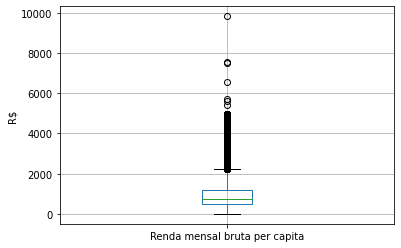

In [5]:

fies2019.boxplot(column=['Renda mensal bruta per capita'])
plt.ylabel('R$')
plt.show()

Após a análise do boxplot pode-se verificar que a renda concentra-se entre quem não tem nenhuma renda, até o valor de 2000 reais. Tendo um número considerável de outliers com valores maiores que 2000 .

## Dispersão para o número de inscrições para os estados.

O Estado SP foi oque teve um maior número de incrições, totalizando 32896

O Estado RR foi oque teve um menor número de incrições, totalizando 374



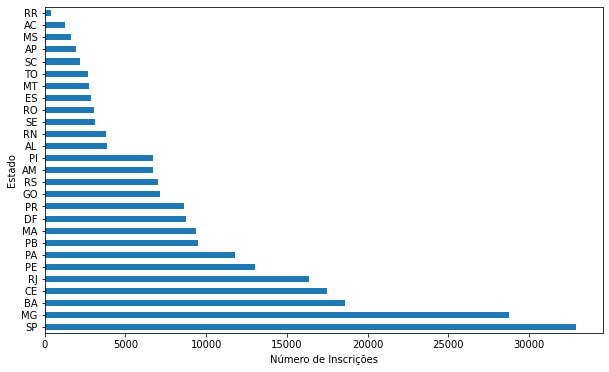

In [6]:
fies2019_estado = fies2019['UF do Local de Oferta'].value_counts()
maior_Inscricao = fies2019_estado.max()
estado = fies2019_estado[ fies2019_estado ==  maior_Inscricao].index[0]
print(f"O Estado {estado} foi oque teve um maior número de incrições, totalizando {maior_Inscricao}\n")

menor_Inscricao = fies2019_estado.min()
estado = fies2019_estado[ fies2019_estado ==  menor_Inscricao].index[0]
print(f"O Estado {estado} foi oque teve um menor número de incrições, totalizando {menor_Inscricao}\n")


fies2019_estado.plot.barh(figsize=(10,6))
plt.ylabel('Estado')
plt.xlabel('Número de Inscrições')
plt.show()

O estado de São Paulo, com 32897 inscrições foi o estado com maior número de inscrições do País,  em contrapartida, Roraima foi o estado com menos inscrições, sendo 374 inscrições para todo o estado. Verifica-se uma baixa dispersão entre os números de inscrição por estado, tendo as inscrições concentradas nos estados : RJ, CE, BA, MG e SP.

##  Faixa predominante de espera entre a conclusão do ensino médio e a inscrição na faculdade por meio do FIES

In [7]:
from datetime import date, timedelta

 
fies2019['Anos para inscrição após EM'] = fies2019['Ano conclusão ensino médio'].apply(lambda x : 2019 -  x) 

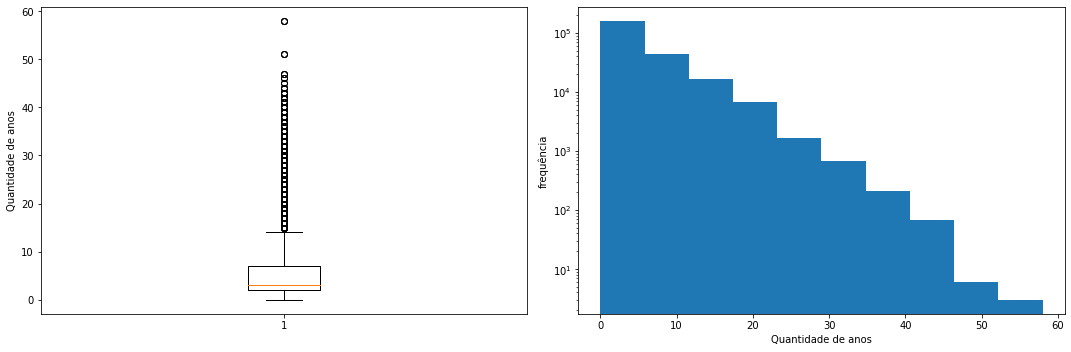

In [8]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

keys = list(fies2019['Anos para inscrição após EM'].keys())
values = list(fies2019['Anos para inscrição após EM'])



ax[0].boxplot(values)
ax[0].set(ylabel='Quantidade de anos')


ax[1].hist(values, bins=10)
ax[1].set(xlabel='Quantidade de anos', ylabel='frequência')
ax[1].set_yscale('log')
fig.tight_layout()

plt.show()

Observando os dados através de  boxplot e pelo histograma para a dispersão da faixa de espera entre a conclusão do ensino médio e a inscrição na faculdade por meio do FIES, pode-se verificar que a faixa predominante encontra-se entre 0 e 10 anos de espera.

##   As pessoas com deficiência estão menos inseridas nos aceitos do FIES?

Número de pessoas sem deficiência contratada:  25315
A porcentagem de pessoas sem deficiência contratada foi 10.98% 




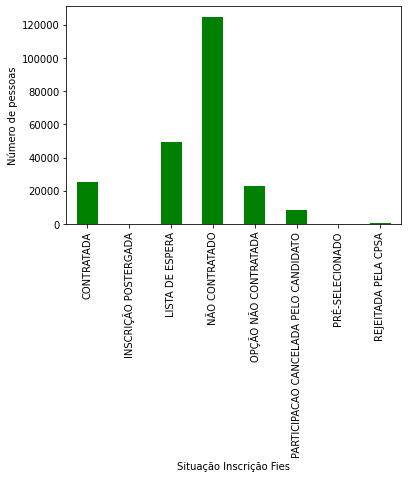

In [9]:
fies2019_pessoa_sem_deficiencia =  fies2019[fies2019['Pessoa com deficiência?'] == 'NÃO'] 

pessoas_contradatas_sem_def = fies2019_pessoa_sem_deficiencia[fies2019_pessoa_sem_deficiencia['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas sem deficiência contratada: ", pessoas_contradatas_sem_def['ID do estudante'].size )

porcentagem_aprovada = pessoas_contradatas_sem_def['ID do estudante'].size  * 100 /   fies2019_pessoa_sem_deficiencia['ID do estudante'].size 

print(f"A porcentagem de pessoas sem deficiência contratada foi {porcentagem_aprovada:.2f}% \n\n")

# Plotando o gráfico
fies2019_pessoa_sem_deficiencia.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='g')
plt.ylabel('Número de pessoas');
plt.show()

Número de pessoas com deficiência contratada:  139
A porcentagem de pessoas com deficiência contratada foi 7.62% 




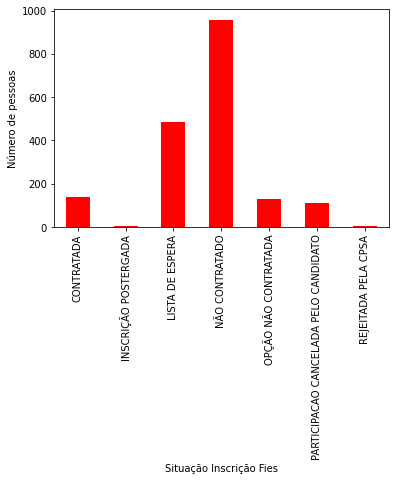

In [10]:


fies2019_pessoa_com_deficiencia =  fies2019[fies2019['Pessoa com deficiência?'] == 'SIM'] 

pessoas_contradatas_com_def = fies2019_pessoa_com_deficiencia[fies2019_pessoa_com_deficiencia['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas com deficiência contratada: ", pessoas_contradatas_com_def['ID do estudante'].size )

porcentagem_aprovada = pessoas_contradatas_com_def['ID do estudante'].size  * 100 /   fies2019_pessoa_com_deficiencia['ID do estudante'].size 

print(f"A porcentagem de pessoas com deficiência contratada foi {porcentagem_aprovada:.2f}% \n\n")

# Plotando o gráfico
fies2019_pessoa_com_deficiencia.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='r')
plt.ylabel('Número de pessoas');
plt.show()

Plotando um gráfico para pessoas com deficiência e para pessoas sem deficiência é possivél ver que os dados se assemelham, tendo um baixo nivél de aprovação nos dois casos. Sendo 10,98% de aprovação para pessoas sem deficiência, e uma porcentagem de 7,62% para pessoas com deficiência .

# Exploração dos dados 2020

### Faixa de renda per capita predominante no requerimento do FIES

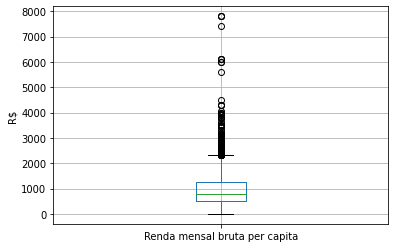

In [11]:

fies2020.boxplot(column=['Renda mensal bruta per capita'])
plt.ylabel('R$')
plt.show()

Após a análise do boxplot pode-se verificar que a renda concentra-se entre quem não tem nenhuma renda, até o valor de 2000 reais. Tendo um número considerável de outliers com valores entre 2000 e 4000.

## Dispersão para o número de inscrições para os estados.

O Estado SP foi oque teve um maior número de incrições, totalizando 24534

O Estado RR foi oque teve um menor número de incrições, totalizando 342



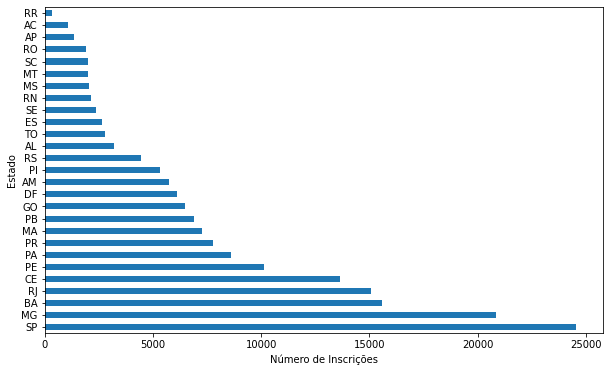

In [12]:
fies2020_estado = fies2020['UF do Local de Oferta'].value_counts()
maior_Inscricao = fies2020_estado.max()
estado = fies2020_estado[ fies2020_estado ==  maior_Inscricao].index[0]
print(f"O Estado {estado} foi oque teve um maior número de incrições, totalizando {maior_Inscricao}\n")

menor_Inscricao = fies2020_estado.min()
estado = fies2020_estado[ fies2020_estado ==  menor_Inscricao].index[0]
print(f"O Estado {estado} foi oque teve um menor número de incrições, totalizando {menor_Inscricao}\n")


fies2020_estado.plot.barh(figsize=(10,6))
plt.ylabel('Estado')
plt.xlabel('Número de Inscrições')
plt.show()

O estado de São Paulo, com 24534 inscrições foi o estado com maior número de inscrições do País,  em contrapartida, Roraima foi o estado com menos inscrições, sendo 342 inscrições para todo o estado. Verifica-se uma baixa dispersão entre os números de inscrição por estado, tendo as inscrições concentradas nos mesmos estados que nos dados de 2019.

##  Faixa predominante de espera entre a conclusão do ensino médio e a inscrição na faculdade por meio do FIES

In [13]:
fies2020['Anos para inscrição após EM'] = fies2020['Ano conclusão ensino médio'].apply(lambda x : 2020 -  x) 

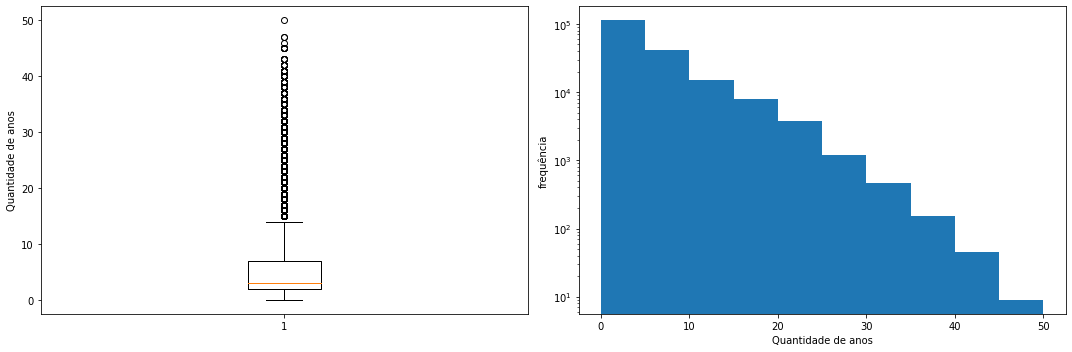

In [14]:
fig, ax = plt.subplots(1, 2, figsize=(15,5))

keys = list(fies2020['Anos para inscrição após EM'].keys())
values = list(fies2020['Anos para inscrição após EM'])


ax[0].boxplot(values)
ax[0].set(ylabel='Quantidade de anos')


ax[1].hist(values, bins=10)
ax[1].set(xlabel='Quantidade de anos', ylabel='frequência')
ax[1].set_yscale('log')
fig.tight_layout()

plt.show()

Observando os dados através do boxplot temos uma visão que a faixa predominante está entre 0 e 15, ao olhar para o histograma , pode-se verificar que é correspondente sendo as diferenças amenizadas pelo fato do gráfico estar em escala logaritma.

##   As pessoas com deficiência estão menos inseridas nos aceitos do FIES?

Número de pessoas sem deficiência contratada:  13338
A porcentagem de pessoas sem deficiência contratada foi 7.37% 




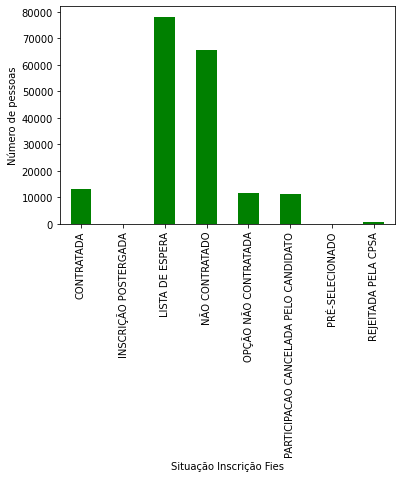

In [15]:
fies2020_pessoa_sem_deficiencia =  fies2020[fies2020['Pessoa com deficiência?'] == 'NÃO'] 

pessoas_contradatas_sem_def = fies2020_pessoa_sem_deficiencia[fies2020_pessoa_sem_deficiencia['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas sem deficiência contratada: ", pessoas_contradatas_sem_def['ID do estudante'].size )

porcentagem_aprovada = pessoas_contradatas_sem_def['ID do estudante'].size  * 100 /   fies2020_pessoa_sem_deficiencia['ID do estudante'].size 

print(f"A porcentagem de pessoas sem deficiência contratada foi {porcentagem_aprovada:.2f}% \n\n")

# Plotando o gráfico
fies2020_pessoa_sem_deficiencia.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='g')
plt.ylabel('Número de pessoas');
plt.show()

Número de pessoas com deficiência contratada:  77
A porcentagem de pessoas com deficiência contratada foi 5.01% 




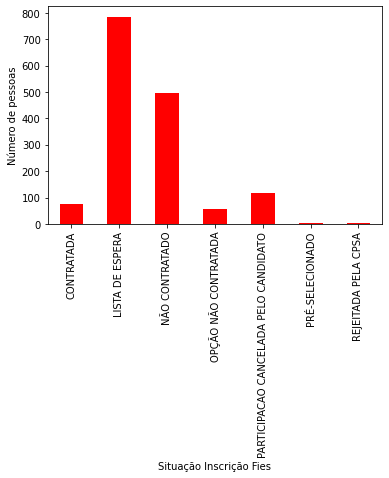

In [16]:
fies2020_pessoa_com_deficiencia =  fies2020[fies2020['Pessoa com deficiência?'] == 'SIM'] 

pessoas_contradatas_com_def = fies2020_pessoa_com_deficiencia[fies2020_pessoa_com_deficiencia['Situação Inscrição Fies'] == 'CONTRATADA']
print("Número de pessoas com deficiência contratada: ", pessoas_contradatas_com_def['ID do estudante'].size )

porcentagem_aprovada = pessoas_contradatas_com_def['ID do estudante'].size  * 100 /   fies2020_pessoa_com_deficiencia['ID do estudante'].size 

print(f"A porcentagem de pessoas com deficiência contratada foi {porcentagem_aprovada:.2f}% \n\n")

# Plotando o gráfico
fies2020_pessoa_com_deficiencia.groupby('Situação Inscrição Fies').count()['ID do estudante'].plot(kind='bar',color='r')
plt.ylabel('Número de pessoas');
plt.show()

Plotando um gráfico para pessoas com deficiência e para pessoas sem deficiência é possivél ver que os dados se assemelham, tendo um baixo nivél de aprovação nos dois casos, e uma grande parte dos candidatos na fila de espera. Sendo 7,37% de aprovação para pessoas sem deficiência, e uma porcentagem de 5,01% para pessoas com deficiência.

# Estatística descritiva

## Há uma faixa renda per capita predominante no requerimento do FIES?


### 2019

In [17]:
mean_renda_pc = fies2019['Renda mensal bruta per capita'].mean()
print('Média da renda: {}'.format(mean_renda_pc))
dp_renda_pc = fies2019['Renda mensal bruta per capita'].std()
print('Desvio padrão da renda: {}'.format(dp_renda_pc))
median_renda_pc = fies2019['Renda mensal bruta per capita'].median()
print('Mediana da renda: {}'.format(median_renda_pc))
max_renda_pc = fies2019['Renda mensal bruta per capita'].max()
print('Valor máximo da renda: {}'.format(max_renda_pc))

# Percentil 25 (1º quartil)
print('Percentil 25: {:.2f}'.format(fies2019['Renda mensal bruta per capita'].quantile(.25)))

# Percentil 50 (2º quartil ou mediana)
print('Percentil 50: {:.2f}'.format(fies2019['Renda mensal bruta per capita'].quantile(.50)))

# Percentil 75 (3º quartil)
print('Percentil 75: {:.2f}'.format(fies2019['Renda mensal bruta per capita'].quantile(.75)))

# Percentil 95
print('Percentil 95: {:.2f}'.format(fies2019['Renda mensal bruta per capita'].quantile(.95)))

Média da renda: 938.7790923797069
Desvio padrão da renda: 623.3622707644018
Mediana da renda: 760.0
Valor máximo da renda: 9831.36
Percentil 25: 499.00
Percentil 50: 760.00
Percentil 75: 1200.00
Percentil 95: 2254.57


### 2020

In [18]:
mean_renda_pc = fies2020['Renda mensal bruta per capita'].mean()
print('Média da renda: {}'.format(mean_renda_pc))
dp_renda_pc = fies2020['Renda mensal bruta per capita'].std()
print('Desvio padrão da renda: {}'.format(dp_renda_pc))
median_renda_pc = fies2020['Renda mensal bruta per capita'].median()
print('Mediana da renda: {}'.format(median_renda_pc))
max_renda_pc = fies2020['Renda mensal bruta per capita'].max()
print('Valor máximo da renda: {}'.format(max_renda_pc))

# Percentil 25 (1º quartil)
print('Percentil 25: {:.2f}'.format(fies2020['Renda mensal bruta per capita'].quantile(.25)))

# Percentil 50 (2º quartil ou mediana)
print('Percentil 50: {:.2f}'.format(fies2020['Renda mensal bruta per capita'].quantile(.50)))

# Percentil 75 (3º quartil)
print('Percentil 75: {:.2f}'.format(fies2020['Renda mensal bruta per capita'].quantile(.75)))

# Percentil 95
print('Percentil 95: {:.2f}'.format(fies2020['Renda mensal bruta per capita'].quantile(.95)))

Média da renda: 977.875462189941
Desvio padrão da renda: 635.3838379473301
Mediana da renda: 786.67
Valor máximo da renda: 7805.53
Percentil 25: 522.50
Percentil 50: 786.67
Percentil 75: 1250.00
Percentil 95: 2448.62


## Como é a dispersão entre os dados da quantidade de inscrições para os estados das IES com mais e menos inscritos?

### 2019

In [19]:
max_insc_uf = fies2019['UF do Local de Oferta'].value_counts().max()
min_insc_uf = fies2019['UF do Local de Oferta'].value_counts().min()
print("Número de inscritos do estado com maior número de inscritos: ", max_insc_uf)
print("Número de inscritos do estado com menor número de inscritos: ", min_insc_uf)
print("Diferença entre o maior e menor: ", max_insc_uf - min_insc_uf)

Número de inscritos do estado com maior número de inscritos:  32896
Número de inscritos do estado com menor número de inscritos:  374
Diferença entre o maior e menor:  32522


In [20]:
max_uf_lo = fies2019['UF do Local de Oferta'].value_counts().mean()
print('Média de inscritos: {}'.format(max_uf_lo))
dp_uf_lo = fies2019['UF do Local de Oferta'].value_counts().std()
print('Desvio padrão de inscritos: {}'.format(dp_uf_lo))
median_uf_lo = fies2019['UF do Local de Oferta'].value_counts().median()
print('Mediana de inscritos: {}'.format(median_uf_lo))


# Percentil 25 (1º quartil)
print('Percentil 25: {:.2f}'.format(fies2019['UF do Local de Oferta'].value_counts().quantile(.25)))

# Percentil 50 (2º quartil ou mediana)
print('Percentil 50: {:.2f}'.format(fies2019['UF do Local de Oferta'].value_counts().quantile(.50)))

# Percentil 75 (3º quartil)
print('Percentil 75: {:.2f}'.format(fies2019['UF do Local de Oferta'].value_counts().quantile(.75)))

# Percentil 95
print('Percentil 95: {:.2f}'.format(fies2019['UF do Local de Oferta'].value_counts().quantile(.95)))

Média de inscritos: 8608.592592592593
Desvio padrão de inscritos: 8181.503511717801
Mediana de inscritos: 6737.0
Percentil 25: 2838.50
Percentil 50: 6737.00
Percentil 75: 10659.00
Percentil 95: 25700.50


### 2020

In [21]:
max_insc_uf = fies2020['UF do Local de Oferta'].value_counts().max()
min_insc_uf = fies2020['UF do Local de Oferta'].value_counts().min()
print("Número de inscritos do estado com maior número de inscritos: ", max_insc_uf)
print("Número de inscritos do estado com menor número de inscritos: ", min_insc_uf)
print("Diferença entre o maior e menor: ", max_insc_uf - min_insc_uf)

Número de inscritos do estado com maior número de inscritos:  24534
Número de inscritos do estado com menor número de inscritos:  342
Diferença entre o maior e menor:  24192


In [22]:
max_uf_lo = fies2020['UF do Local de Oferta'].value_counts().mean()
print('Média de inscritos: {}'.format(max_uf_lo))
dp_uf_lo = fies2020['UF do Local de Oferta'].value_counts().std()
print('Desvio padrão de inscritos: {}'.format(dp_uf_lo))
median_uf_lo = fies2020['UF do Local de Oferta'].value_counts().median()
print('Mediana de inscritos: {}'.format(median_uf_lo))


# Percentil 25 (1º quartil)
print('Percentil 25: {:.2f}'.format(fies2020['UF do Local de Oferta'].value_counts().quantile(.25)))

# Percentil 50 (2º quartil ou mediana)
print('Percentil 50: {:.2f}'.format(fies2020['UF do Local de Oferta'].value_counts().quantile(.50)))

# Percentil 75 (3º quartil)
print('Percentil 75: {:.2f}'.format(fies2020['UF do Local de Oferta'].value_counts().quantile(.75)))

# Percentil 95
print('Percentil 95: {:.2f}'.format(fies2020['UF do Local de Oferta'].value_counts().quantile(.95)))

Média de inscritos: 6756.481481481482
Desvio padrão de inscritos: 6239.283374594395
Mediana de inscritos: 5340.0
Percentil 25: 2088.50
Percentil 50: 5340.00
Percentil 75: 8195.00
Percentil 95: 19251.70


# Tabela

### UF e número de inscritos

### 2019

In [23]:
uf = fies2019['UF do Local de Oferta'].unique()
estado_num = []
for u in uf:
    num = fies2019[fies2019['UF do Local de Oferta'] == u]['UF do Local de Oferta'].size
    estado_num.append([u, num])
estado_num = pd.DataFrame(estado_num, columns=['Estado', 'Número de inscrições'])
estado_num

,Estado,Número de inscrições
0,PR,8637
1,PE,13043
2,RS,7017
3,MG,28753
4,SP,32896
5,RJ,16378
6,BA,18578
7,MS,1666
8,ES,2904
9,SC,2204


### 2020

In [24]:
uf = fies2020['UF do Local de Oferta'].unique()
estado_num = []
for u in uf:
    num = fies2020[fies2020['UF do Local de Oferta'] == u]['UF do Local de Oferta'].size
    estado_num.append([u, num])
estado_num = pd.DataFrame(estado_num, columns=['Estado', 'Número de inscrições'])
estado_num

,Estado,Número de inscrições
0,PR,7794
1,PE,10148
2,RS,4471
3,SP,24534
4,MG,20830
5,BA,15569
6,RJ,15072
7,MS,2037
8,ES,2663
9,SC,1986
